# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [46]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Penguin Short (from MP VII) ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

m = 28 (~0.7 s) (MP VII) (worst)

m = 25 (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 23 (own research, interesting/best results!)

m = 20

In [47]:
# Parameter
use_case = "chains"
data_name = "penguinshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "penguinshort")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation
# same data from Robustness Paper:
# data_name = "penguin2022"
# T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "ts")


### Experiments ###

In [48]:
# Hyperparameter
target_w = 23
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = True # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4]


In [49]:
# calculate:
# calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Visualizing Experiment: target_w=23, m=None, offset=True, groundtruthD1=True, nonoverlapping=False
chain for d=1, m=23, w=23: [ 97 115 133 170 189 266 405 425 485 627 648 730 850]
chain for d=2, m=12, w=23: [ 97 115]
chain for d=3, m=8, w=22: [ 97 115]
chain for d=4, m=7, w=25: [ 97 115]


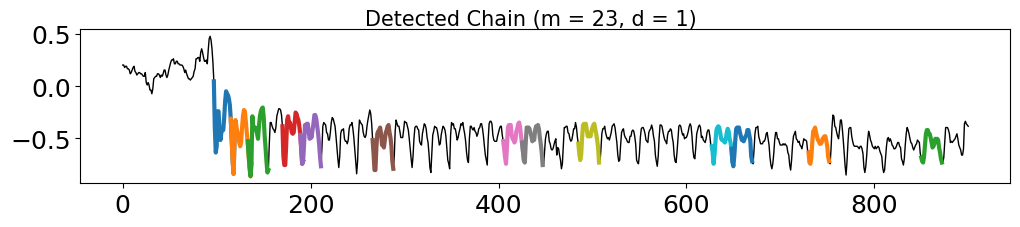

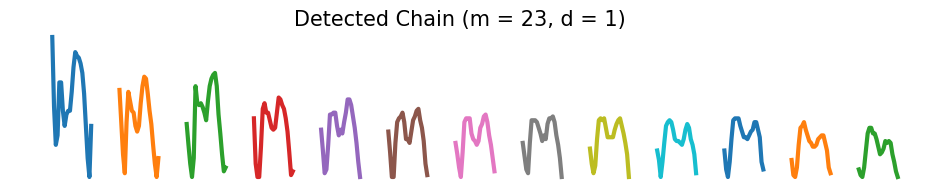

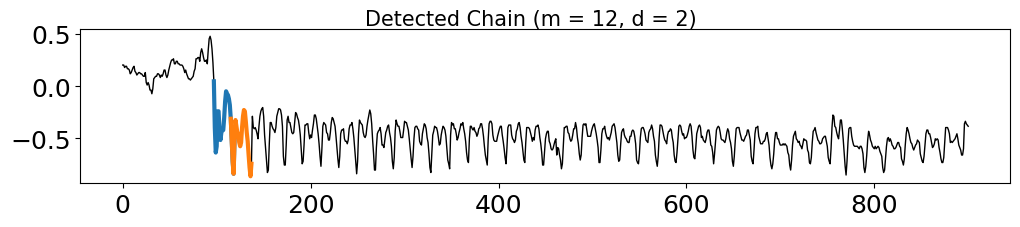

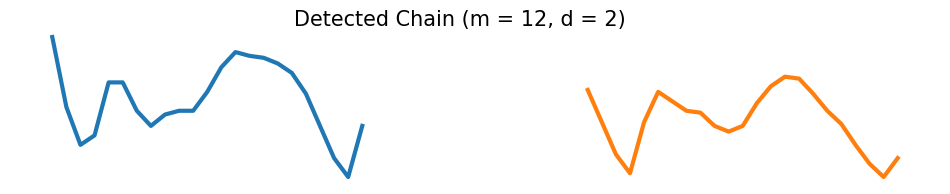

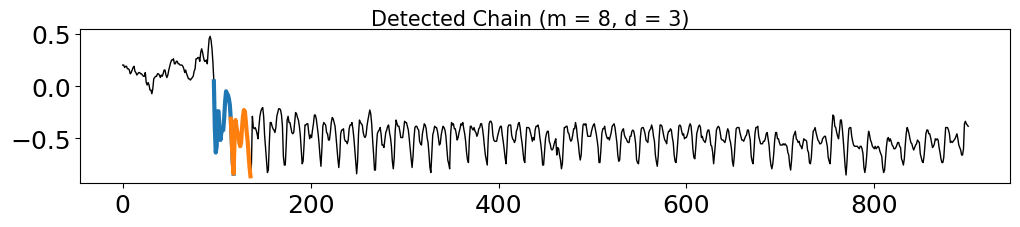

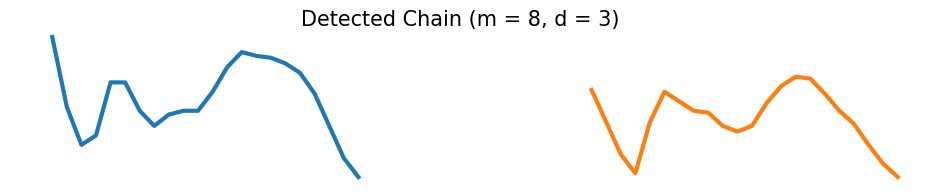

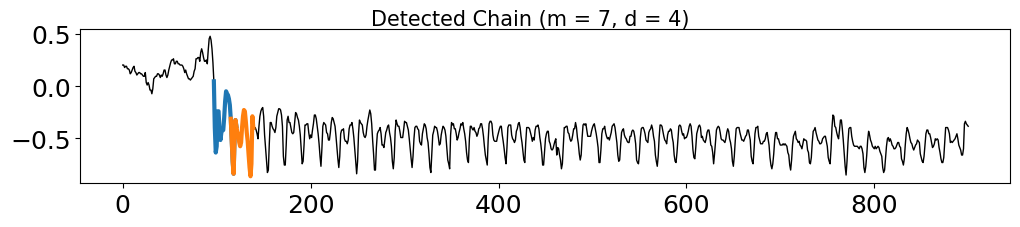

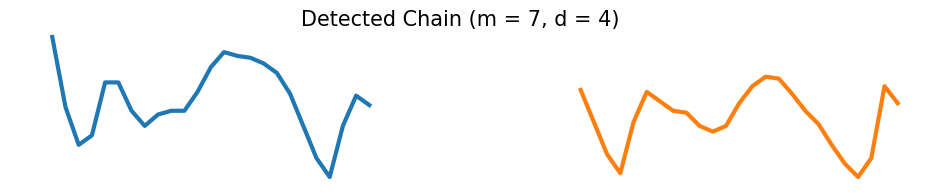

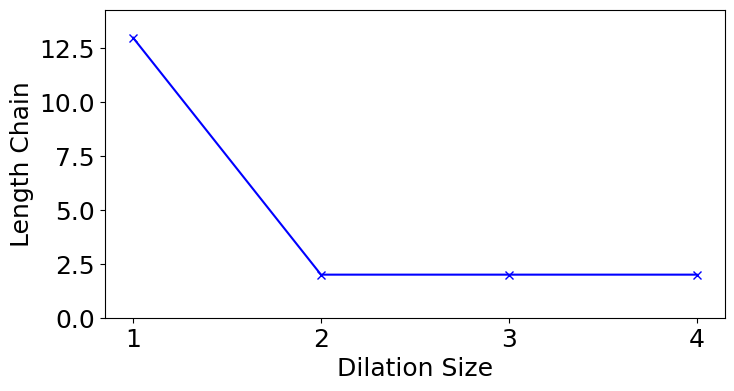

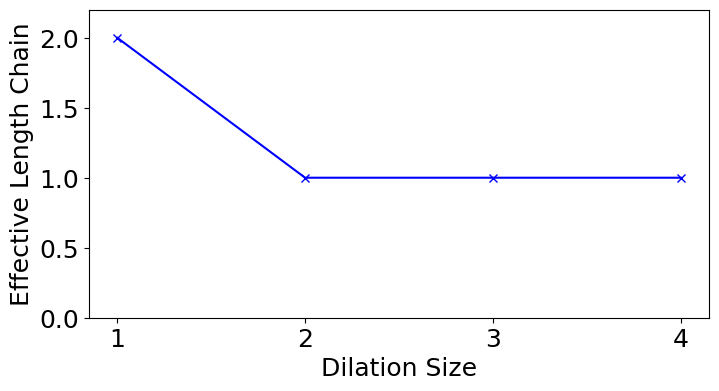

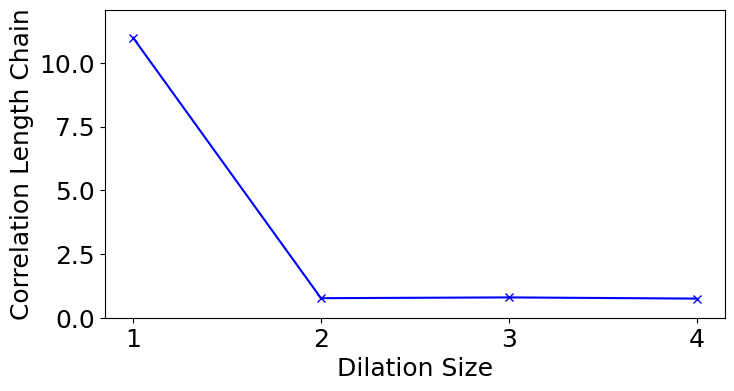

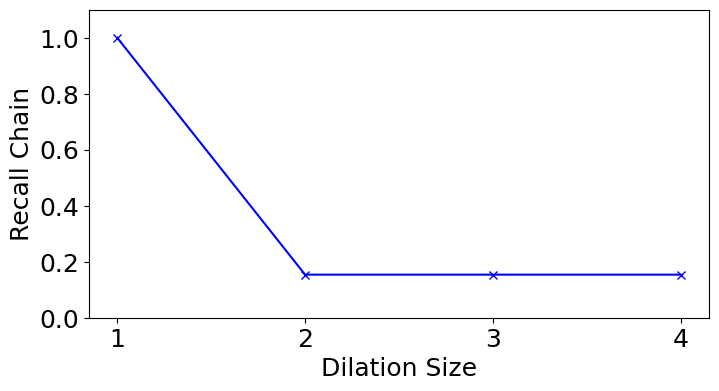

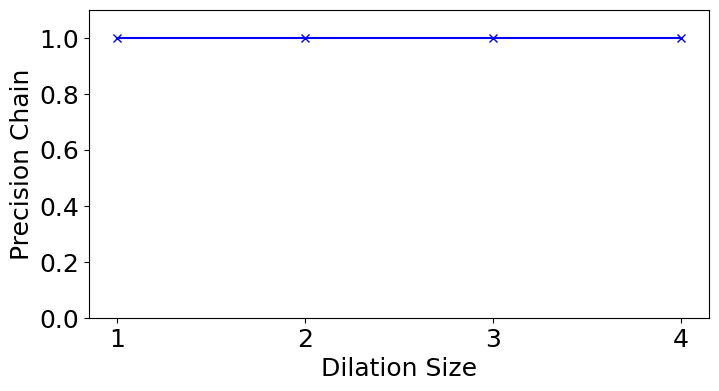

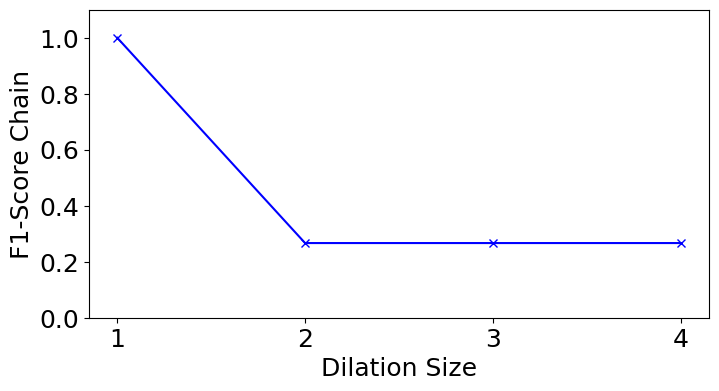

In [50]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)